In [1]:
# Import the libraries we have used before to re-use in this tutorial.

import numpy # https://numpy.org/

import pandas # https://pandas.pydata.org/
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt  # https://matplotlib.org/
import seaborn as sns # https://seaborn.pydata.org/

print('Loading data from file ...')  # Now let's load the data from the floats.csv file (same as before)
dataset = pandas.read_csv('floats.csv') 
print('done \n')

print('Removing rows with missing data ...')  
dataset = dataset.dropna()  
print('done \n')

Loading data from file ...
done 

Removing rows with missing data ...
done 



In [2]:
# We already know what the floats data looks like from a previous example notebook, so no need for EDA
# THIS TIME, SET UP A REGRESSION PROBLEM:
# Can we predict 'Depth' using these two features:  'Salinity', 'Temperature' ?

print('Reading list of problem variables X and Y...')
X_name = [ 'Temperature', 'Salinity' ] # names of columns to focus on as predictors
X = dataset[X_name]   # only keep these columns as features

y_name = 'Depth'      # name of column to focus on as target
y = dataset[y_name]   # only keep this column as NUMERICAL target 
print('done \n')

Reading list of problem variables X and Y...
done 



In [3]:
# Now let's set up our assessment framework - same as for classification tasks
from sklearn import model_selection 

# Split data into training and testing datasets
test_pct = 0.20   # reserve a random 20% of the data points for testing performance
seed = 7          # setting the seed means that _the_same_ 20% will be split for testing every time we run this notebook - this allows for repeatability/reproducibility
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=test_pct, random_state=seed)

# We don't have to code the assessment metrics by hand 
# BUT, confusion_matrix and classification_report are not appropriate assessments for REGRESSION tasks 
from sklearn.metrics import mean_squared_error   # again, plenty of other choices here https://scikit-learn.org/stable/api/sklearn.metrics.html#regression-metrics
from sklearn.metrics import max_error            # that's another example

RESULTS FOR Linear
MSE 12731.73111775117
max 368.52699491715066


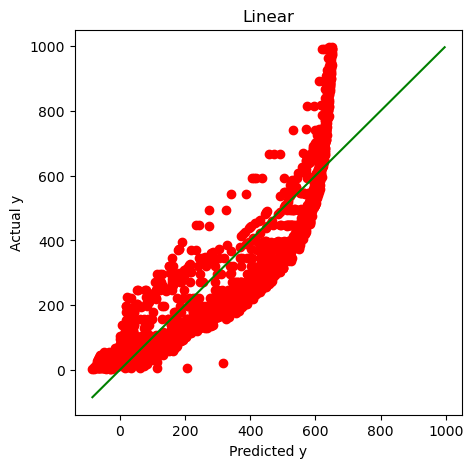

RESULTS FOR KNR-default
MSE 3449.101366583541
max 360.4


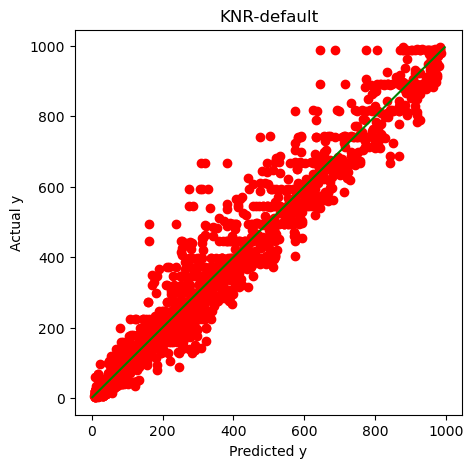

RESULTS FOR KNR-distance
MSE 3737.3337619667886
max 397.0


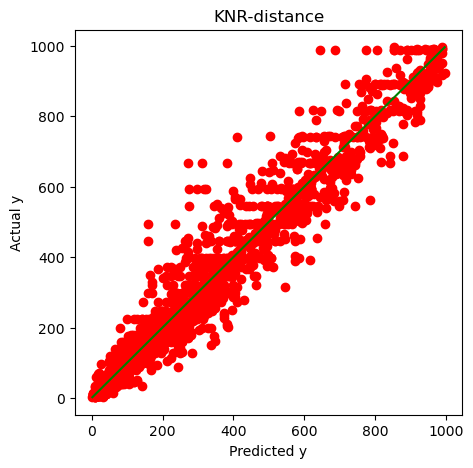

In [4]:
# Now it's time to train candidate models on the training data and check their performance on unseen test data.
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression

# We will first make a list with several models to try out and give them names
models = []
models.append(('Linear', LinearRegression() ))                             # this is the default template model for Linear Regression, we name it Linear
models.append(('KNR-default', KNeighborsRegressor() ))                     # this is the default template model for kNN
models.append(('KNR-distance', KNeighborsRegressor(weights='distance') ))  # this is specifying a variation from the default template


for name, modelName in models:   # Select each model in turn
    modelName.fit(X_train, y_train)  # train the model on the training data
    y_predicted = modelName.predict(X_test)  # make predictions using the test data
    # What does the error look like? compare predictions to ground truth using accuracy as metric 
    print('RESULTS FOR '+name)  
    print('MSE', mean_squared_error(y_test, y_predicted)) # compare predictions to ground truth using MSE as metric 
    print('max', max_error(y_test, y_predicted))          # maximum error when comparing predictions to ground truth (i.e., worst case)
    plt.figure(figsize=(5, 5))
    LL = min([min(y_predicted), min(y_test)])
    UR = max([max(y_predicted), max(y_test)])
    plt.plot(y_predicted, y_test,'ro')
    plt.plot([LL,UR],[LL,UR], 'g-')
    plt.xlabel('Predicted y')
    plt.ylabel('Actual y')
    plt.title(name)
    plt.show()